# Ensemble Machine Learning Algorithms


The three most popular methods for combining the predictions from different models are:

- **Bagging**. Building multiple models (typically of the same type) from different subsamples of the training dataset.
- **Boosting**. Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.
- **Voting**. Building multiple models (typically of differing types) and simple statistics (like calculating the mean) are used to combine predictions.
- **Stacking**. Building multiple models (typically of differing types) and using a meta-learning algorithm to learn how to best combine their predictions.

***
A standard classification problem used to demonstrate each ensemble algorithm is the Pima Indian's onset of diabetes dataset. It is a binary classification problem where all of the input variables are numeric and have differing scales.
***

## Importing the libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## Loading the data

In [30]:
df = pd.read_csv("./diabetes2.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [33]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [34]:
categorical_val = []
continous_val = []
for column in df.columns:
#     print('==============================')
#     print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

# Data Pre-Processing

In [35]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [36]:
# How many missing zeros are mising in each feature
feature_columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
]

for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

Pregnancies ==> Missing zeros : 111
Glucose ==> Missing zeros : 5
BloodPressure ==> Missing zeros : 35
SkinThickness ==> Missing zeros : 227
Insulin ==> Missing zeros : 374
BMI ==> Missing zeros : 11
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [37]:
from sklearn.impute import SimpleImputer


fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)
df[feature_columns] = fill_values.fit_transform(df[feature_columns])

for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

Pregnancies ==> Missing zeros : 0
Glucose ==> Missing zeros : 0
BloodPressure ==> Missing zeros : 0
SkinThickness ==> Missing zeros : 0
Insulin ==> Missing zeros : 0
BMI ==> Missing zeros : 0
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [38]:
from sklearn.model_selection import train_test_split

X = df[feature_columns]
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    #print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"F1-SCORE:\n{f1_score(y_train, y_train_pred, average='weighted'):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("\nTESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"F1-SCORE:\n{f1_score(y_test, y_test_pred, average='weighted'):.4f}")
    #print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# Bagging Algorithms
Bootstrap Aggregation or bagging involves taking multiple samples from your training dataset (with replacement) and training a model for each sample. The final output prediction is averaged across the predictions of all of the sub-models.


## Bagged Decision Trees

Bagging performs best with algorithms that have high variance. A popular example is decision trees, often constructed without pruning. A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregates their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [40]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
F1-SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   349.00 188.00      1.00     537.00        537.00

TESTING RESULTS: 
CONFUSION MATRIX:
[[119  32]
 [ 24  56]]
F1-SCORE:
0.7600
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.83  0.64      0.76       0.73          0.76
recall      0.79  0.70      0.76       0.74          0.76
f1-score    0.81  0.67      0.76       0.74          0.76
support   151.00 80.00      0.76     231.00        231.00


In [41]:
scores = {
    'Bagging Classifier': {
        'Train': f1_score(y_train, bagging_clf.predict(X_train), average='weighted'),
        'Test': f1_score(y_test, bagging_clf.predict(X_test), average='weighted'),
    },
}

## Random Forest

A random forest is a meta-estimator that fits several decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
F1-SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   349.00 188.00      1.00     537.00        537.00

TESTING RESULTS: 
CONFUSION MATRIX:
[[123  28]
 [ 29  51]]
F1-SCORE:
0.7529
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.81  0.65      0.75       0.73          0.75
recall      0.81  0.64      0.75       0.73          0.75
f1-score    0.81  0.64      0.75       0.73          0.75
support   151.00 80.00      0.75     231.00        231.00


In [43]:
scores['Random Forest'] = {
        'Train': f1_score(y_train, rf_clf.predict(X_train), average='weighted'),
        'Test': f1_score(y_test, rf_clf.predict(X_test), average='weighted'),
    }

# Boosting Algorithms
Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions that may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

The two most common boosting ensemble machine learning algorithms are:

1. AdaBoost
2. Stochastic Gradient Boosting
***

## AdaBoost
AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay less attention to them in the construction of subsequent models.

In [44]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[316  33]
 [ 85 103]]
F1-SCORE:
0.7702
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.79   0.76      0.78       0.77          0.78
recall      0.91   0.55      0.78       0.73          0.78
f1-score    0.84   0.64      0.78       0.74          0.77
support   349.00 188.00      0.78     537.00        537.00

TESTING RESULTS: 
CONFUSION MATRIX:
[[131  20]
 [ 34  46]]
F1-SCORE:
0.7602
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.79  0.70      0.77       0.75          0.76
recall      0.87  0.57      0.77       0.72          0.77
f1-score    0.83  0.63      0.77       0.73          0.76
support   151.00 80.00      0.77     231.00        231.00


In [45]:
scores['AdaBoost'] = {
        'Train': f1_score(y_train, ada_boost_clf.predict(X_train), average='weighted'),
        'Test': f1_score(y_test, ada_boost_clf.predict(X_test), average='weighted'),
    }

## Stochastic Gradient Boosting
Stochastic Gradient Boosting (also called Gradient Boosting Machines) is one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps of the best techniques available for improving performance via ensembles.

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[342   7]
 [ 19 169]]
F1-SCORE:
0.9512
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.95   0.96      0.95       0.95          0.95
recall      0.98   0.90      0.95       0.94          0.95
f1-score    0.96   0.93      0.95       0.95          0.95
support   349.00 188.00      0.95     537.00        537.00

TESTING RESULTS: 
CONFUSION MATRIX:
[[116  35]
 [ 26  54]]
F1-SCORE:
0.7389
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.82  0.61      0.74       0.71          0.74
recall      0.77  0.68      0.74       0.72          0.74
f1-score    0.79  0.64      0.74       0.72          0.74
support   151.00 80.00      0.74     231.00        231.00


In [47]:
scores['Gradient Boosting'] = {
        'Train': f1_score(y_train, grad_boost_clf.predict(X_train), average='weighted'),
        'Test': f1_score(y_test, grad_boost_clf.predict(X_test), average='weighted'),
    }

# Voting Ensemble

Voting is one of the simplest ways of combining predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data. 


In [48]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[327  22]
 [ 82 106]]
F1-SCORE:
0.7956
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.80   0.83      0.81       0.81          0.81
recall      0.94   0.56      0.81       0.75          0.81
f1-score    0.86   0.67      0.81       0.77          0.80
support   349.00 188.00      0.81     537.00        537.00

TESTING RESULTS: 
CONFUSION MATRIX:
[[130  21]
 [ 36  44]]
F1-SCORE:
0.7463
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.78  0.68      0.75       0.73          0.75
recall      0.86  0.55      0.75       0.71          0.75
f1-score    0.82  0.61      0.75       0.71          0.75
support   151.00 80.00      0.75     231.00        231.00


In [49]:
scores['Voting'] = {
        'Train': f1_score(y_train, voting.predict(X_train), average='weighted'),
        'Test': f1_score(y_test, voting.predict(X_test), average='weighted'),
    }

# Stacked generalization
Stacked generalization or stacking is a method for combining estimators to reduce their biases. More precisely, the predictions of each individual estimator are stacked together and used as input to a final estimator to compute the prediction (which learn how to best weight the predictions from submodels). This final estimator is trained through cross-validation.

The StackingClassifier and StackingRegressor provide such strategies which can be applied to classification and regression problems.

In [50]:
from sklearn.ensemble import StackingClassifier
estimators = []

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
estimators.append(('RF', rf_clf))

log_reg = LogisticRegression(solver='liblinear')

voting = StackingClassifier(estimators=estimators, final_estimator=log_reg)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[334  15]
 [ 28 160]]
F1-SCORE:
0.9192
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.92   0.91      0.92       0.92          0.92
recall      0.96   0.85      0.92       0.90          0.92
f1-score    0.94   0.88      0.92       0.91          0.92
support   349.00 188.00      0.92     537.00        537.00

TESTING RESULTS: 
CONFUSION MATRIX:
[[123  28]
 [ 35  45]]
F1-SCORE:
0.7241
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.78  0.62      0.73       0.70          0.72
recall      0.81  0.56      0.73       0.69          0.73
f1-score    0.80  0.59      0.73       0.69          0.72
support   151.00 80.00      0.73     231.00        231.00


In [51]:
scores['Stacking'] = {
        'Train': f1_score(y_train, voting.predict(X_train), average='weighted'),
        'Test': f1_score(y_test, voting.predict(X_test), average='weighted'),
    }

# Model Comparison

<Axes: >

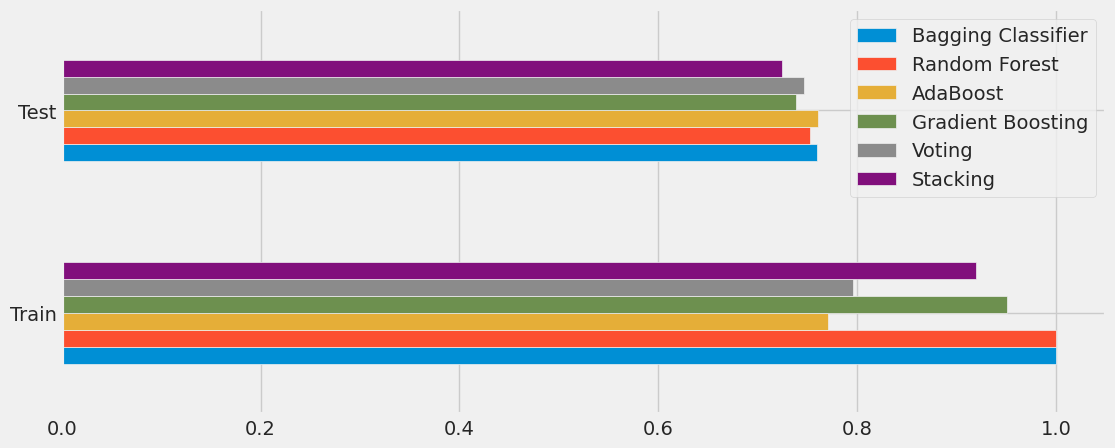

In [52]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(12, 5))

